In [1]:
%matplotlib inline

import glob
import json
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from scipy.stats import skewnorm

# GFDL/Princeton-Area Snowfall

**A 45-year record of snowfall in the Princeton Area is presented below.  This record began as part of a social event at GFDL in 1976 and has grown to become a multi-decadal observational record of snowfall in the Central New Jersey region.  Seasonal total records are presented in CSV format for the entire period and event-level records are archived for each season in JSON format, beginning with the 1995-1996 season.  There is little trend in seasonal total snowfall over this period given a large amount of interannual variability in seasonal snowfall.  Despite this, however, there is indication that the 50th-percentile snowfall season has decreased over the last decade. The seasonal cycle of snowfall peaks in January and February with nearly 10" of snow each month.  During the last decade, snowfall has decreased in this midwinter peak.  There is also a decrease in December snowfall that is partly offset by an increase in early March snow.  The average date of the first snow is December 7 and remains relatively constant throughout the record.  There is a noticeable trend toward an early end to the snowfall season by nearly 3 weeks over the last decade.**

## Background

The GFDL / Princeton area snowfall records began in 1976. The employees of the lab have organized a friendly "snowpool" each year to forecast the amount of seasonal snow to fall in the Princeton area.  The winner of the snowpool uses the entrance fees to buy breakfast for the participants and is given the "Flake of the Year" award.

Over the years, GFDL employees, alumni, and their familes participated in the snowpool.  GFDL's seasonal prediction models have also entered predictions.  On a typical year, there are around 100 entries.  The individual forecasts were not archived and are not included here for analysis.

## Snowfall Records

The GFDL Snowpool Committee maintaines the detailed records of snowfall in the Princeton area that are presented here. Seasonal snowfall total records (October 1 through April 30) date back to the 1976-1977 season while the event-level records date back to the 1995-1996 season. The measurements were quality controlled in "real-time" by the committee.

Snowfall measurements are preferentially taken at GFDL when a member of the committee is present to take the measurement. In the event that the lab is closed or no members are present, the average of the home measurements from each of the committee members is used.  The individual event records are grouped by season and stored in JSON format in the `data/events` directory.

The initials correspond to the snowpool observers:

* `ajb`: Tony Broccoli
* `cw`: Carolyn Whitlock 
* `jpk`: John Krasting
* `rgg`: Rich Gudgel
* `rt`: Bob Tuleya
* `snf`: Stuart Freidenrich
* `wfs`: Bill Stern

Missing measurements are noted by `"M"` and are not considered in event averages.  Trace snowfall measurements are noted by `"T"` and are included in the event average as 0.0". A trace amount is defined as snow that accumulates less than 0.1".

## Seasonal Snowfall Totals

Over the 45 snowfall seasons beginning with th 1976-1977 season, the average yearly snowfall in the Princeton area is **29.5"**. There is wide range in annual snowfall, ranging from a minimum of **3.9" in the 2019-2020 season** to a maximum of **84.4" in the 1995-1996 season**.

In [2]:
df = pd.read_csv("data/seasonal_totals.csv",index_col="End Year")
print(df.describe())

       Snowfall (in.)
count       45.000000
mean        29.462222
std         17.088902
min          3.900000
25%         17.000000
50%         25.000000
75%         40.700000
max         84.400000


There is considerable interannual variability of snowfall in the Princeton area ($\sigma$ = 17.1") and the lag-1 autocorrelation is nearly zero.  The three-year boxcar-smoothed snowfall highlights strong decadal-scale variability beginning in the mid-1990s.

In [3]:
x = df.index
y = df["Snowfall (in.)"]

# lag-1 autocorrelation
print(f"Lag-1 autocorrelation: {np.corrcoef(y[1::],y[:-1])[0][1]}")

Lag-1 autocorrelation: 0.0016180745276967489


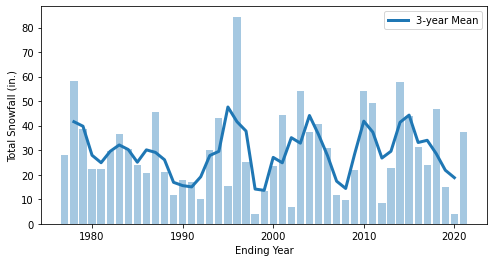

In [4]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.bar(x,y,alpha=0.4)

# three-year running mean
y2 = y.rolling(3,center=True).mean()
ax.plot(x,y2,linewidth=3,label="3-year Mean")

plt.legend()

_ = ax.set_xlabel("Ending Year")
_ = ax.set_ylabel("Total Snowfall (in.)")

Only a very small amount of the interannual variabilty is related to ENSO.  Below is the correlation between Princeton area seasonal snowfall and the ONI index from the previous year. Correlations between 0.22 and 0.24 are found between between the ONI index during the preceding summer months and the total snowfall during the following season.

Text(0.5, 1.0, 'Correlation between ONI and Total Seasonal Snowfall')

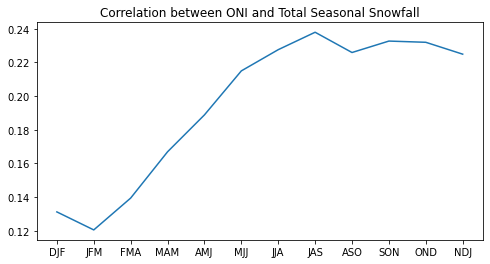

In [5]:
df_oni = pd.read_csv("ONI.csv",index_col="Year")
oni = df_oni.loc[slice(1977,2020)]["NDJ"]

r = [np.corrcoef(y2[1:-1],df_oni.loc[slice(1977,2020)][x][1:])[0,1] for x in df_oni.columns]
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(1,1,1)
ax.plot(r)
_ = plt.xticks(range(0,len(df_oni.columns)), df_oni.columns)
plt.title("Correlation between ONI and Total Seasonal Snowfall")

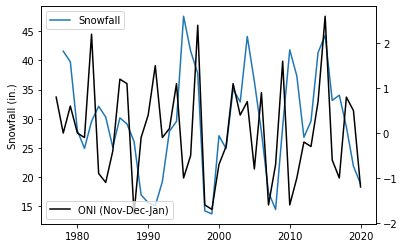

In [6]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(y2,label="Snowfall")
plt.legend(loc=2)
plt.ylabel("Snowfall (in.)")
ax2 = ax.twinx()
_ = ax2.plot(oni,"k", label="ONI (Nov-Dec-Jan)")
plt.legend(loc=3)

There is little change in the distribution of seasonal snowfall beteween the period where event-level records exists (1995 and later) and the preceding period.  There is an increase in the range of seasonal snowfall and a slight increase in the 50th percentile event (28.0" vs. 24.1").  When considering changes over the beginning of the 21st century, there is a slight decrease in the 50th percentile event (34.3" vs. 27.8").

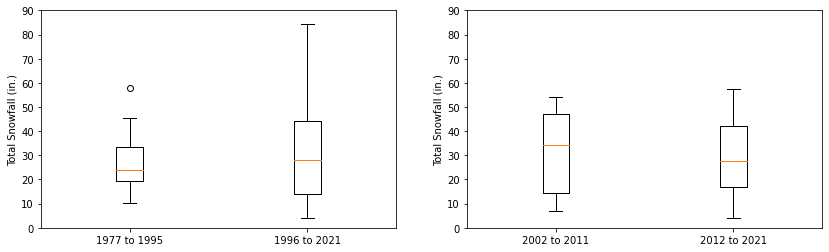

In [7]:
fig = plt.figure(figsize=(14,4))

ax1 = plt.subplot(1,2,1)
_ = ax1.boxplot([
    df.loc[slice(1977,1995)]["Snowfall (in.)"],
    df.loc[slice(1996,2021)]["Snowfall (in.)"]],
    labels=["1977 to 1995","1996 to 2021"],)

ax2 = plt.subplot(1,2,2)
_ = ax2.boxplot([
    df.loc[slice(2002,2011)]["Snowfall (in.)"],
    df.loc[slice(2012,2021)]["Snowfall (in.)"]],
    labels=["2002 to 2011","2012 to 2021"],)

for ax in [ax1,ax2]:
    ax.set_ylim(0,90)
    ax.set_ylabel("Total Snowfall (in.)")

## Mean Seasonal Cycle of Snowfall

Based on the event-level data beginning in the 1995-1996 season, the seasonal cycle of snowfall in the Princeton area peaks in January and February, with an average of 10" and 9" of snow, respectively.  The seasonal cycle is slightly skewed (0.34) toward the second half of the snowfall season.  December and March have on average 4.5 to 5.5" while the other months typically have an inch or less of snow.

In [8]:
# read the events into a dictionary and convert the dictionary to 
# a pandas DataFrame

events = []
years = sorted(glob.glob("data/events/*.json"))

for n,year in enumerate(years):
    with open(year,'r') as f:
        _events = json.load(f)
        for e in _events:
            e["season"] = n+20
        events = events + _events
    f.close() 

df = pd.DataFrame(events)

# create a datetime index
df = df.set_index("start_date")
df.index = pd.to_datetime(df.index)
df = pd.DataFrame(df[["mean","day_of_season","season"]])

In [9]:
def seasonal_cycle(df,n_tot_years):
    """Calculates the seasonal cycle of snowfall"""

    # calculate a monthly total for each year
    _df = df.copy()
    _df = _df.groupby(by=[_df.index.month, _df.index.year]).sum()

    # rename the indicies for clarity
    _df.index = _df.index.rename(["month", "year"])

    # sum over the months, but divide by the total number of years
    # in the climatology
        
    _df = _df.groupby(by=["month"]).sum() / n_tot_years
    _df = _df.reindex([10, 11, 12, 1, 2, 3, 4])

    return _df

# Time indexing below might change in the future with Pandas, filtering warning for now
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

df_all_events = seasonal_cycle(df,26)
df_1996_2005 = seasonal_cycle(df.loc[slice("1995-10-01","2005-09-30")],10)
df_2011_2021 = seasonal_cycle(df.loc[slice("2011-10-01","2021-09-30")],10)

In [10]:
print(df_all_events["mean"])

month
10     0.126923
11     0.596154
12     5.473077
1     10.146154
2      9.015385
3      4.676923
4      1.015385
Name: mean, dtype: float64


Text(0, 0.5, 'Probability')

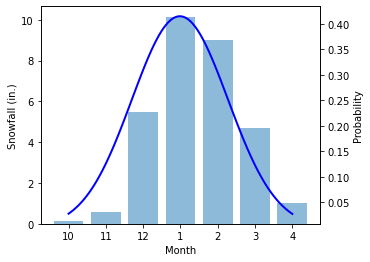

In [11]:
y = df_all_events["mean"]
x = np.arange(1,len(y)+1)

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(1,1,1)
ax.bar(x,y,alpha=0.5)

positions = [1, 2, 3, 4, 5, 6, 7]
labels = [str(x) for x in df_all_events.index]
ax.xaxis.set_major_locator(mticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(mticker.FixedFormatter(labels))

ax.set_xlabel("Month")
ax.set_ylabel("Snowfall (in.)")


# Fit a skewed normal distribution
ax2 = ax.twinx()

# calculated skewness
a = float(df_all_events["mean"].skew())

x = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.99, a), 100)
x2 = np.linspace(1,7,100)
ax2.plot(x2, skewnorm.pdf(x, a),'b', lw=2)
ax2.set_ylabel("Probability")

There is a noticeable shift in the seasonal cycle between the first and last decades of the event-level record.  There is an overall trend toward less snow, particularly in the midwinter peak. There is also a significant decrease in December snow that is partly offset by an increase in March snowfall.  April snow averaged around 2" but has essentially been eliminated in the last decade.

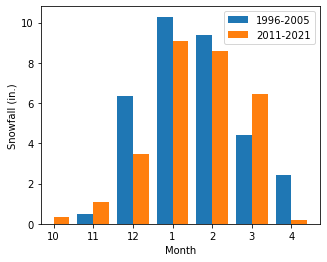

In [12]:
y1 = df_1996_2005["mean"]
y2 = df_2011_2021["mean"]
x = np.arange(1,len(y)+1)

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(1,1,1)

plt.bar(x - 0.2, y1, 0.4, label = '1996-2005')
plt.bar(x + 0.2, y2, 0.4, label = '2011-2021')

plt.xticks(x, [str(x) for x in df_all_events.index])
ax.set_xlabel("Month")
ax.set_ylabel("Snowfall (in.)")
plt.legend()
plt.show()

## Length of the Snowfall Season

There is little change in the start of the snowfall season in Princeton.  The average first day of snowfall in Princeton averages on **December 7**.  There is no discernable trend in this start date over the record.  There is a significant trend in the last day of snowfall, however.  During the period 1996-2005, the average last day of snowfall was **March 31**.  This date has shifted almost three weeks earlier to **March 10** during the last 10 years.

Text(0, 0.5, 'Days since 1-October')

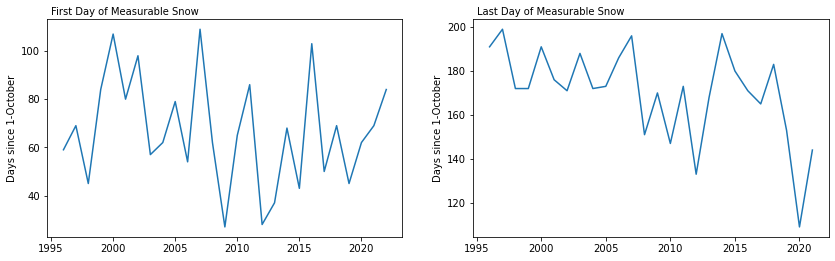

In [13]:
fig = plt.figure(figsize=(14,4))

ax1 = plt.subplot(1,2,1)
y = df.groupby(by=df.season).min()["day_of_season"]
x = [x+1996 for x in range(0,len(y))]
ax1.plot(x,y)
ax1.text(0.01,1.02,"First Day of Measurable Snow",transform=ax1.transAxes)
ax1.set_ylabel("Days since 1-October")

ax2 = plt.subplot(1,2,2)
# leave out this year, (2021-2022)
y = df.groupby(by=df.season).max()["day_of_season"][:-1]
x = [x+1996 for x in range(0,len(y))]
ax2.plot(x,y)
ax2.text(0.01,1.02,"Last Day of Measurable Snow",transform=ax2.transAxes)
ax2.set_ylabel("Days since 1-October")

The top 5 "snow droughts", or extended periods without snow have all occured since the year 2000.

In [14]:
# calculate the time delta between events
t1 = df[df["mean"]>0].index.values[1::]
t0 = df[df["mean"]>0].index.values[0:-1]
delta = t1-t0

# convert to days
delta = [int(x*1e-9/86400) for x in delta]

# identify the top 5 longest periods
top5 = np.argsort(delta)[::-1][0:6]
days = [delta[x] for x in top5]

# format the dates
t1s = [pd.to_datetime(t1[x]).strftime("%Y-%m-%d") for x in top5]
t0s = [pd.to_datetime(t0[x]).strftime("%Y-%m-%d") for x in top5]
periods = list(zip(days,t1s,t0s))

# print the results
for n,x in enumerate(periods):
    print(f"{n+1}.  {x[0]} days  ({x[2]} to {x[1]})")

1.  326 days  (2020-01-18 to 2020-12-09)
2.  319 days  (2021-02-22 to 2022-01-07)
3.  304 days  (2010-02-25 to 2010-12-26)
4.  300 days  (1999-03-22 to 2000-01-16)
5.  288 days  (2015-03-30 to 2016-01-12)
6.  288 days  (2006-04-05 to 2007-01-18)


## Discussion and Conclusions

The GFDL / Princeton-Area snowpool record is an unique record that began to support a social activity at the lab.  It has since become a multi-decadal climate record of snowfall for Central New Jersey.

This record mixes point oberservations from GFDL with area-averaged observations from surrounding locations.  It is not clear how representative a straight average versus a more thoughtful approach (i.e. optimal interpolation) would impact the results.  No attempt to analyze "observer bias" was made and could also provide important insight to the record.

ENSO is weakly correlated with snowfall in the Princeton area, but other factors should also be considered.  Changes in blocking, for example, are known to be important drivers of East Coast snowfall and would likely be reflected through analysis of the NAO index.  Additional local factors, such as increased sea surface temperatures, may also be important in understanding some of the early season changes in snowfall.

Overall, trends in seasonal total snowfall are not found in this dataset given the multitude of factors that can influence snowfall totals.  Totals can also be strongly influenced by individual events and a single large snowfall event can often account for an otherwise below-average season.  Nonetheless, the shortening of the snowfall seaon by almost 3 weeks in March is an interesting feature of this record and may be one indication of a changing climate in this region.